In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings

from datetime import datetime, date,timedelta
from matplotlib import gridspec
from matplotlib import cm

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_SF = pd.read_pickle('df_SF.pkl')

In [3]:
df_SF.head()


,TIMESTAMP,DOY,SV_IN_1A,SV_OUT_1A,SV_MEAN_1A,SV_IN_1B,SV_OUT_1B,SV_MEAN_1B,SV_IN_2A,SV_OUT_2A,...,SV_MEAN_6A,SV_IN_7A,SV_OUT_7A,SV_MEAN_7A,SV_IN_8A,SV_OUT_8A,SV_MEAN_8A,SV_IN_9A,SV_OUT_9A,SV_MEAN_9A
0,2015-01-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 00:15:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 00:30:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01 00:45:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01 01:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_SF['DATE'] = [datetime.date(i) for i in df_SF['TIMESTAMP']]
df_SF.head()

,TIMESTAMP,DOY,SV_IN_1A,SV_OUT_1A,SV_MEAN_1A,SV_IN_1B,SV_OUT_1B,SV_MEAN_1B,SV_IN_2A,SV_OUT_2A,...,SV_IN_7A,SV_OUT_7A,SV_MEAN_7A,SV_IN_8A,SV_OUT_8A,SV_MEAN_8A,SV_IN_9A,SV_OUT_9A,SV_MEAN_9A,DATE
0,2015-01-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015-01-01 00:15:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015-01-01 00:30:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015-01-01 00:45:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015-01-01 01:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


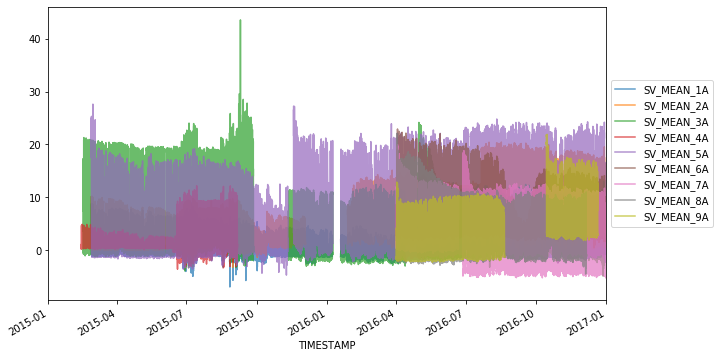

In [9]:
df_SF.plot(x='TIMESTAMP',
                 y=['SV_MEAN_1A','SV_MEAN_2A','SV_MEAN_3A','SV_MEAN_4A',
                   'SV_MEAN_5A','SV_MEAN_6A','SV_MEAN_7A','SV_MEAN_8A','SV_MEAN_9A'],
            alpha=0.7, 
                figsize = [10,6])
plt.legend(loc = 'center left',bbox_to_anchor=(1, 0.5))

In [5]:
df_SF_grouped = df_SF.groupby(['DATE'],as_index = False)
df_SF_daily = df_SF_grouped.mean()
df_SF_daily.head()

,DATE,DOY,SV_IN_1A,SV_OUT_1A,SV_MEAN_1A,SV_IN_1B,SV_OUT_1B,SV_MEAN_1B,SV_IN_2A,SV_OUT_2A,...,SV_MEAN_6A,SV_IN_7A,SV_OUT_7A,SV_MEAN_7A,SV_IN_8A,SV_OUT_8A,SV_MEAN_8A,SV_IN_9A,SV_OUT_9A,SV_MEAN_9A
0,2015-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_SF_daily.to_pickle('df_SF_daily.pkl')

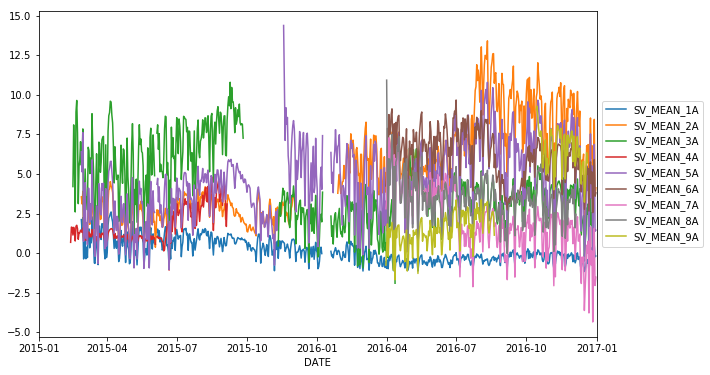

In [12]:
df_SF_daily.plot(x='DATE',
                 y=['SV_MEAN_1A','SV_MEAN_2A','SV_MEAN_3A','SV_MEAN_4A',
                   'SV_MEAN_5A','SV_MEAN_6A','SV_MEAN_7A','SV_MEAN_8A','SV_MEAN_9A'],
                figsize = [10,6])
plt.legend(loc = 'center left',bbox_to_anchor=(1, 0.5))

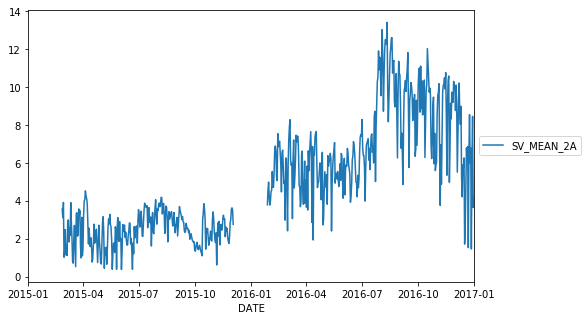

In [16]:
df_SF_daily.plot(x='DATE',
                 y='SV_MEAN_2A',
                figsize = [8,5])
plt.legend(loc = 'center left',bbox_to_anchor=(1, 0.5))